1. [X-Ray](#x-ray)
2. [Visual Analysis of Applications](#visual-analysis-of-applications)
3. [X-Ray compatibility](#x-ray-compatibility)
4. [X-Ray - Tracing](#x-ray---tracing)
5. [Enable X-Ray](#enable-x-ray)
6. [X-Ray Magic](#x-ray-magic)
7. [X-Ray not working on EC2](#x-ray-not-working-on-ec2)
8. [Enable X-Ray on Lambda](#enable-x-ray-on-lambda)
9. [Setup X-Ray via CloudFormation - Method I](#setup-x-ray-via-cloudformation---method-i)
10. [Troubleshooting SNS service issue](#troubleshooting-sns-service-issue)
11. [Setup X-Ray Directly via X-Ray console - Method II](#setup-x-ray-directly-via-x-ray-console---method-ii)
12. [Old X-Ray UI Features](#old-x-ray-ui-features)
13. [X-Ray instrumentation and concepts](#x-ray-instrumentation-and-concepts)
14. [X-Ray Concepts](#x-ray-concepts)
15. [X-Ray Sampling rules](#x-ray-sampling-rules)
16. [Custom - Sampling Rules](#custom---sampling-rules)
17. [Setup X-Ray Sampling Rules - CloudWatch](#setup-x-ray-sampling-rules---cloudwatch)
18. [X-Ray APIs](#x-ray-apis)
19. [X-Ray - Beanstalk](#x-ray---beanstalk)
20. [Setup X-Ray for Beanstalk](#setup-x-ray-for-beanstalk)
21. [X-Ray - ECS](#x-ray---ecs)
22. [Task Definition - X-Ray & ECS](#task-definition---x-ray--ecs)
23. [AWS Distro - Open Telemetry](#aws-distro---open-telemetry)

#### X-Ray:
- Troubleshooting application performance and errors
- Distributed tracing of micro-services
    - understanding dependencies in micro-services
- Debugging in Production
    - Test Locally
    - Add Log statements everywhere
    - Re-Deploy application
- Visual analysis of application
- Pinpoint service issues
- Review request behavior (API request, etc,.)
    - Find errors and exceptions
- Monitoring SLA of services
    - eg: latency
- Identify users impacted

Note:
- CloudWatch disadvantages:
    - Log formats differ across applications using CloudWatch
        - Therefore, analytics is hard
        - Monolith -> Easy
        - Distributed -> Hard
    - No common view of architecture
- The above disadvantages can be overcome by X-Ray

#### Visual Analysis of Applications:

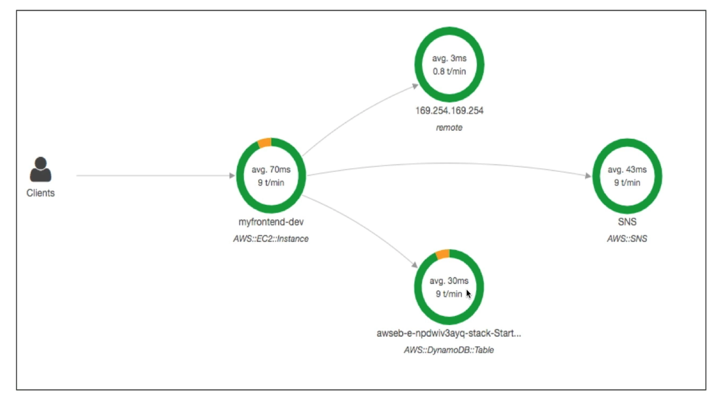

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/visual.jpeg')
new_image = img.resize((720, 400))
display(new_image)

#### X-Ray compatibility:
- AWS Lambda
- Elastic Beanstalk
- ECS
- EBS
- EC2 instance
- API Gateway

#### X-Ray - Tracing:
- Tracing end-end way of following a request
- Each component (database, Load Balancer, API Gateway, etc) dealing with the request add its own trace
- Tracing made up of segments and sub segments
- Annotation can be added to traces to provide additional information
- Ability to trace:
    - Every Request
    - Filter Request (Sampling - %)
- Security:
    - IAM Authorization
    - KMS encryption

#### Enable X-Ray:
- Code (Java, Python, Node.js, Go, .NET) must import the AWS X-Ray SDK
    - Minute code modification
    - X-Ray SDK will capture:
        - calls to AWS service
        - HTTP/HTTPS requests
        - Database calls (SQL, PostgreSQL, DynamoDB)
- Install X-Ray daemon or enable X-Ray AWS Integration
    - X-Ray daemon => low level UDP packet interceptor (EC2 - Mac/Windows/Linux)
- AWS Lambda/Other AWS services already run the X-Ray daemon for you
- Each Application should have IAM rights to write data into X-Ray

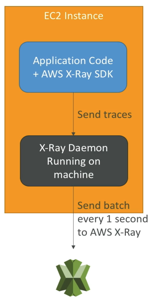

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray.jpeg')
new_image = img.resize((150, 300))
display(new_image)

#### X-Ray Magic:
- Collects data from all AWS services
- Service Map is computed from all trace segments
- X-Ray is graphical, easy to troubleshoot

#### X-Ray not working on EC2:
- Ensure proper EC2 IAM roles
- Ensure X-Ray daemon is running in EC2

##### Enable X-Ray on Lambda:
- Ensure IAM execution role with proper policy (AWSX-RayWriteOnlyAccess)
- Ensure X-Ray is imported in code
- Enable Lambda X-Ray Active Tracing (on X-Ray)

#### Setup X-Ray via CloudFormation - Method I:

- Go to CloudFormation console and deploy the App by creating a stack with below file config
- Once the CloudFormation Stack is successfully launched
    - Go to Output Tab in CloudFormation Stack
        - Click on Load Balancer URL and load the game webpage (tic-tac-toe)
            - Play the game and perform some website user actions

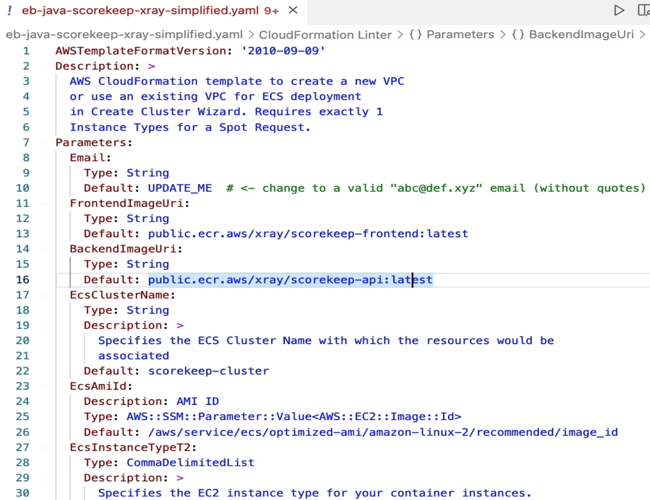

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudformation.jpeg')
new_image = img.resize((650, 500))
display(new_image)

- Go to X-Ray console/CloudWatch X-Ray traces
    - Go to Service/Traces Map
        - View the visual graph of the progress
            - Each components of service is clickable

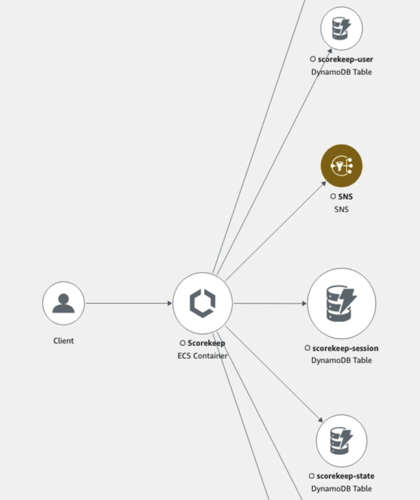

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray-visual.jpeg')
new_image = img.resize((420, 500))
display(new_image)

- Above Image, the component service SNS highlighted in (brown/red) shows the error in deployment

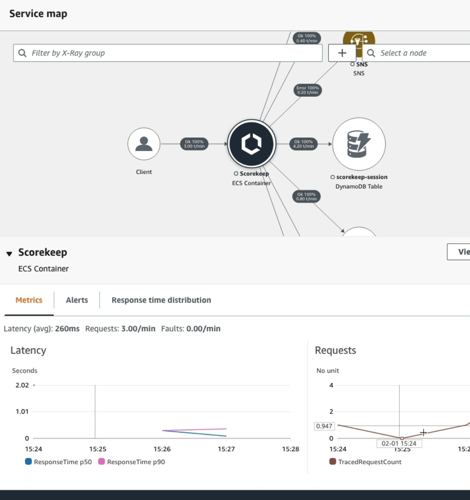

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray-visual1.jpeg')
new_image = img.resize((470, 500))
display(new_image)

- The above image, the service components are clickable
- Once we select the service, we have several options to debug
    - Metrics
        - Latency
        - Requests
        - Faults
    - Alerts
    - Response time distribution


#### Troubleshooting SNS service issue:
- Zoom the visual representation (lines connecting the ECS service and SNS service)
    - Provides the error % per time

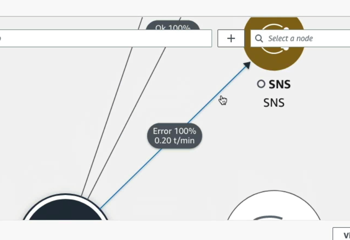

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray-visual2.jpeg')
new_image = img.resize((350, 240))
display(new_image)

- Select the SNS to investigate the issue
    - Click "View Traces"
        - Filter by X-Ray group
        - Use Query to filter service
        - Query refiner 
            - Node (by selecting the node we can create the query)
                - ScoreKeep
                - ScoreKeep Notification
                - ScoreKeep Session
            - HTTP Request
            - User
            - Client IP
            - HTTP Status Code
            - User Agent
            - User
            - User Annotation
            - Instance ID
            - URL
            - Root cause message
            - AZ
            - Resource ARN
            - Entry Point

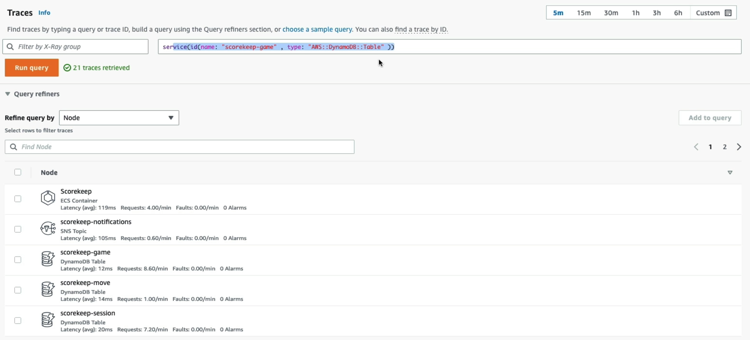

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray-visual3.jpeg')
new_image = img.resize((750, 340))
display(new_image)

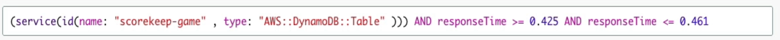

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/query.jpeg')
new_image = img.resize((780, 40))
display(new_image)

- Response time distribution
    - We can check for response time for requests

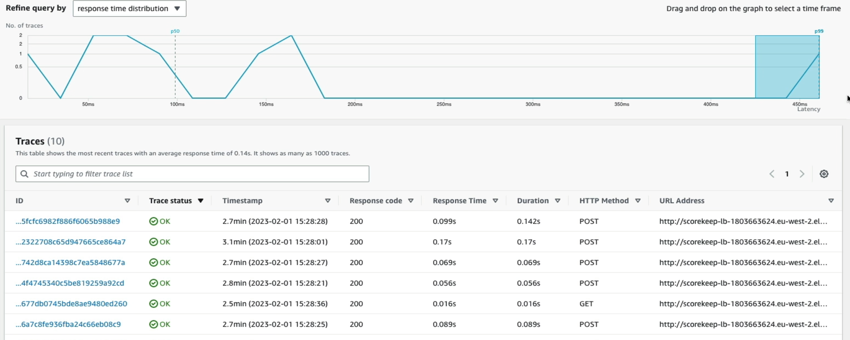

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray-visual4.jpeg')
new_image = img.resize((850, 340))
display(new_image)

- Traces
    - Based on the request time, we can identity the trace causing issue
    - Click on the identified trace
        - We can see the trace details (segments timeline) and respective trace map

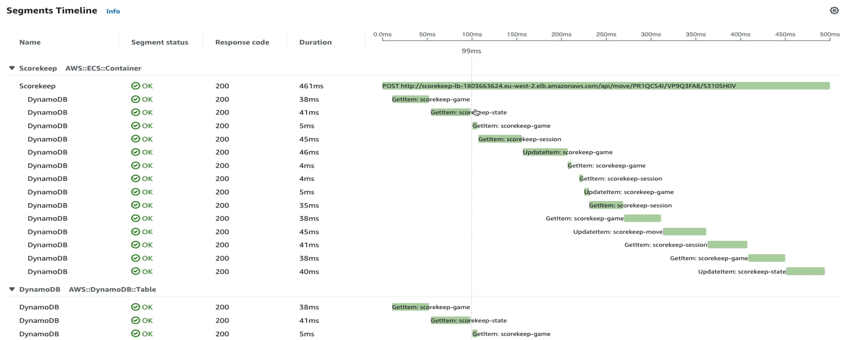

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray-visual5.jpeg')
new_image = img.resize((850, 340))
display(new_image)

- By selecting one of the segments within the node, we can view the segment level details
    - Eg: ScoreKeep -> Dynamo -> 461ms
- Segment Level details:
    - Resources
    - Metadata
    - Overview
    - Annotations

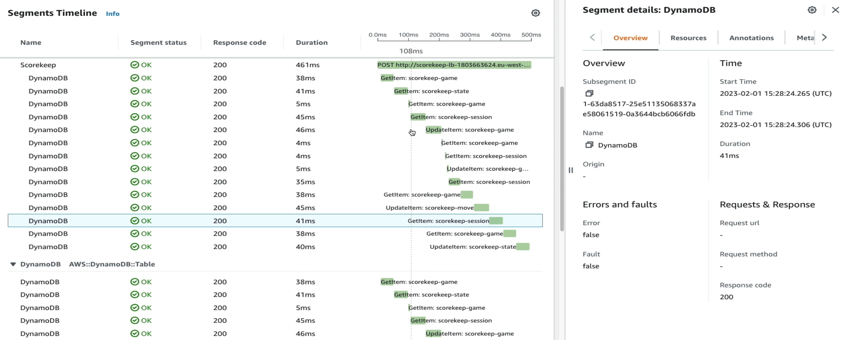

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/x-ray-visual6.jpeg')
new_image = img.resize((850, 340))
display(new_image)

- We can also see CloudWatch Logs if enabled

Note:
- Not all feature are migrated to new X-Ray UI, thereby use old UI for non-migrated features in X-Ray
    - https://us-east-1.console.aws.amazon.com/xray/home?region=us-east-1

#### Setup X-Ray Directly via X-Ray console - Method II:

- Go to X-Ray console
    - It will re-direct to CloudWatch console
    - Go to X-Ray traces option (left-side)
        - Traces
        - Trace Map
            - Set a demo App

#### Old X-Ray UI Features:
- Configurations
    - Sampling
    - Encryption
    - Groups
- Insights
- Analytics

#### X-Ray instrumentation and concepts:
- measure product performance
- diagnose errors
- write trace information
- To instrument application
    - use X-Ray SDK
- Require only configuration changes
- Modify application code to customize and annotate data that SDK sends to X-Ray using interceptors, filters, handlers, middleware, etc

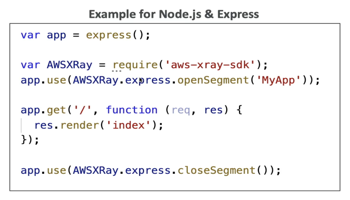

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/instrument.jpeg')
new_image = img.resize((350, 200))
display(new_image)

##### X-Ray Concepts:
- Segments: Each application/service will send them
- Subsegments: If we need more details about the segments
- Sampling: reduce cost and reduce the % of request being sent to X-Ray
- Trace: end-end trace of the application, segments collected together
- Metadata: Key-Value pairs but not used for searching and not indexed
- Annotation: Key-Value pairs used for searching and indexed
- X-Ray Daemon/Agent: has a config within to send traces cross account
    - ensure proper IAM permissions are set up.

#### X-Ray Sampling rules:
- Sampling rules control the amount of information to be recorded in X-Ray
    - the more data send to X-Ray, the more the cost
- Modify sampling rules without any code change
- By default, X-Ray SDK records the every first request in each second and 5% of any additional request
    - Reservoir: First request per second (ensures atleast one trace is recorded each second)
    - Rate: 5% additional requests are sampled beyond the reservoir size

#### Custom - Sampling Rules:
- Create own sampling rules with reservoir and rate

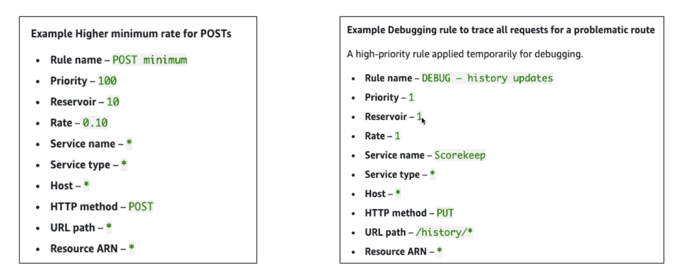

In [47]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/sampling.jpeg')
new_image = img.resize((680, 280))
display(new_image)

#### Setup X-Ray Sampling Rules - CloudWatch:
- Go to CloudWatch console
- Go to Settings (left-side pane)   
    - X-Ray traces
        - transaction search
        - sampling rules
            - Default Sampling rule (already created)
            - Create Sampling rule
                - Name
                - Priority
                - Limits
                    - Reservoir size
                    - Fixed Rate
                - Matching Criteria
                    - Service Name
                    - Service Type
                    - HTTP Method
                    - URL Path
                    - Resource ARN
                    - Host
                - Tags
                - Create
        - encryption
        - groups

#### X-Ray APIs:
- Write API (used by X-Ray daemon)
    - PutTraceSegments: upload segment documents into X-Ray
    - PutTelemetryRecords: upload telemetry data such as segments received counts, rejected counts, backend connection errors, etc
    - GetSamplingRules, GetSamplingTargets, GetSamplingStatistic: send the sampling rules change/update to the X-Ray Daemon

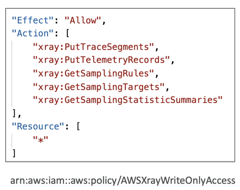

In [54]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/write.jpeg')
new_image = img.resize((240, 190))
display(new_image)

- X-Ray Read API
    - GetSamplingRules, GetSamplingTargets, GetSamplingStatistic: send the sampling rules change/update to the X-Ray Daemon
    - GetServiceGraph: main graph
    - GetTraceGraph: retrieve specific trace graph using trace IDs
    - BatchGetTraces: retrieves a list of traces by Id. Each trace is a collection of segment documents that originate from a single request
    - GetTraceSummaries: retrieve IDs and annotations for traces available for a specific time frame using optional filter
        - To get full traces, pass the trace IDs to BatchGetTraces

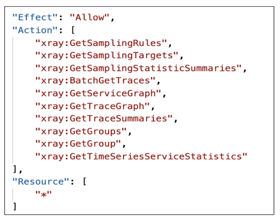

In [52]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/read.jpeg')
new_image = img.resize((280, 220))
display(new_image)

#### X-Ray - Beanstalk:
- Beanstalk include by default the X-Ray daemon
- We run the daemon by setting an option in Elastic Beanstalk console or uploading a configuration file (.ebextensions/xray-daemon.config)
- Ensure the instance profile have proper IAM permissions
- Ensure code is instrumented with AWS X-Ray SDK
- X-Ray Daemon is not provided for multi-container docker

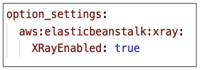

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/xray-daemon.jpeg')
new_image = img.resize((200, 70))
display(new_image)

#### Setup X-Ray for Beanstalk:
- Go to Beanstalk console
    - Create Application
        - Name
        - Platform
        - Code
    - Configure more options
        - Go to software option
            - Edit
                - X-Ray
                    - X-Ray Daemon
                        - Enabled
        - Go to Security option
            - Edit
            - Check Service Role
            - Check the IAM instance profile
                - Go to IAM console and under Roles, search for IAM instance profile role
                    - Go to permissions tab to view the IAM policies attached to the role
                        - Open any policy document 
                            - Go to Policy Summary
                                - View & Open X-Ray mentioned
                                    - View the X-Ray Policy actions attached


#### X-Ray - ECS:

X-Ray Container as Daemon (EC2 cluster):
- X-Ray Daemon is installed at EC2 level

X-Ray Container as Side Car (EC2 cluster):
- X-Ray Daemon is installed at Application container level

X-Ray Container as Side Car (Fargate cluster):
- X-Ray Daemon is installed at Application container level


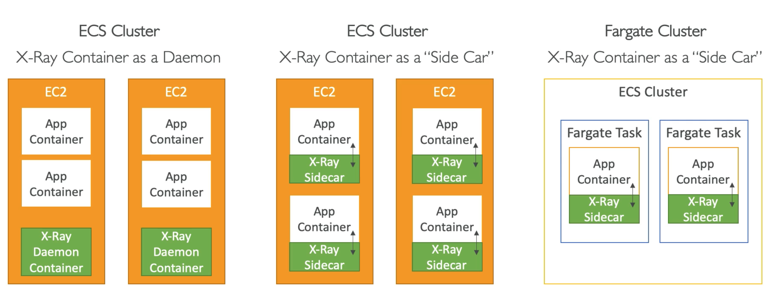

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ecs.jpeg')
new_image = img.resize((770, 300))
display(new_image)

#### Task Definition - X-Ray & ECS:

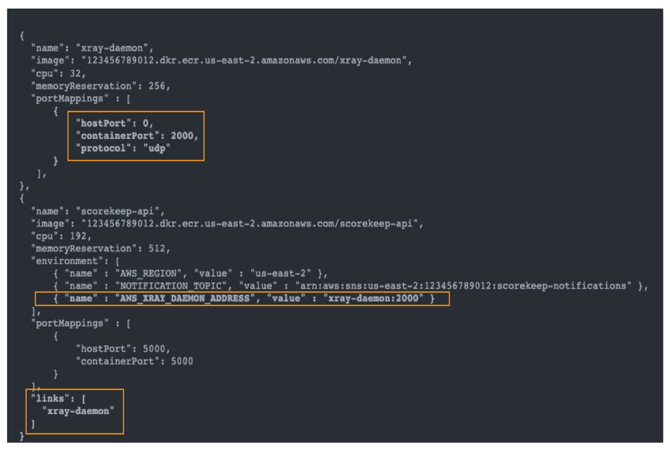

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ecs1.jpeg')
new_image = img.resize((670, 450))
display(new_image)

#### AWS Distro - Open Telemetry:
- Its very similar to AWS X-Ray but this is open source
- provide single set of APIs, libraries, agents, collector service
- Collects distributes traces from Apps
- Collects metadata from AWS resources and service
- Auto instrumentation agents to collect traces without code changes
- Send traces and metrics to multiple AWS services and partner solutions
   - X-Ray, CloudWatch, Prometheus, ect
- Instrument apps running on EC2, ECS, EKS, Fargate, Lambda as well as on-premises

Note:
- Migrate from X-Ray to AWS Distro, if we want to standardize with open-source APIs from Telemetry or send traces to multiple destinations simultaneously

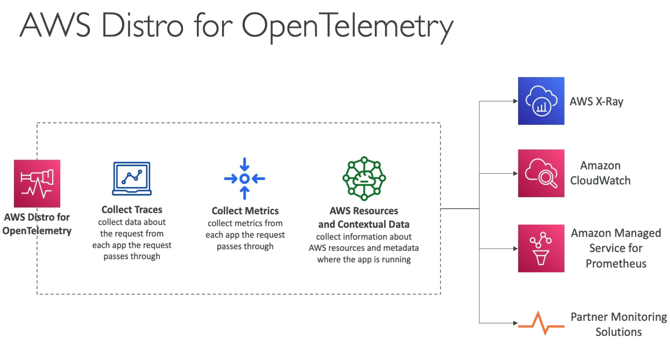

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/distro.jpeg')
new_image = img.resize((670, 350))
display(new_image)